In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
Accidents_2015_file_path = 'C:/Users/s1478186/Downloads/MachineLearningData/Accidents_2015.csv'
Accidents_2015_data = pd.read_csv(Accidents_2015_file_path)


Accidents_2016_file_path = 'C:/Users/s1478186/Downloads/MachineLearningData/dftRoadSafety_Accidents_2016.csv'
Accidents_2016_data = pd.read_csv(Accidents_2016_file_path)

Accidents_2017_file_path = 'C:/Users/s1478186/Downloads/MachineLearningData/Acc.csv'
Accidents_2017_data = pd.read_csv(Accidents_2017_file_path) 


C:\Users\s1478186\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\s1478186\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(Accidents_2015_data.shape,Accidents_2016_data.shape,Accidents_2017_data.shape)

(140056, 32) (136621, 32) (129982, 32)


In [5]:
x2k15 = pd.Series([]); y2k15 = pd.Series([]); z2k15 = pd.Series([]);
x2k15 = np.cos(np.radians(Accidents_2015_data["Latitude"]))*np.cos(np.radians(Accidents_2015_data["Longitude"]));
y2k15 = np.cos(np.radians(Accidents_2015_data["Latitude"]))*np.sin(np.radians(Accidents_2015_data["Longitude"]));
z2k15 = np.sin(np.radians(Accidents_2015_data["Latitude"]));

x2k16 = pd.Series([]); y2k16 = pd.Series([]); z2k16 = pd.Series([]);
x2k16 = np.cos(np.radians(Accidents_2016_data["Latitude"]))*np.cos(np.radians(Accidents_2016_data["Longitude"]));
y2k16 = np.cos(np.radians(Accidents_2016_data["Latitude"]))*np.sin(np.radians(Accidents_2016_data["Longitude"]));
z2k16 = np.sin(np.radians(Accidents_2016_data["Latitude"]));

x2k17 = pd.Series([]); y2k17 = pd.Series([]); z2k17 = pd.Series([]);
x2k17 = np.cos(np.radians(Accidents_2017_data["Latitude"]))*np.cos(np.radians(Accidents_2017_data["Longitude"]));
y2k17 = np.cos(np.radians(Accidents_2017_data["Latitude"]))*np.sin(np.radians(Accidents_2017_data["Longitude"]));
z2k17 = np.sin(np.radians(Accidents_2017_data["Latitude"]));

Accidents_2015_data.insert(5, "x", x2k15)
Accidents_2015_data.insert(6, "y", y2k15)
Accidents_2015_data.insert(7, "z", z2k15)

Accidents_2016_data.insert(5, "x", x2k16)
Accidents_2016_data.insert(6, "y", y2k16)
Accidents_2016_data.insert(7, "z", z2k16)

Accidents_2017_data.insert(5, "x", x2k17)
Accidents_2017_data.insert(6, "y", y2k17)
Accidents_2017_data.insert(7, "z", z2k17)

In [6]:
Accidents_2015_data['Date'] = pd.to_datetime(Accidents_2015_data['Date'], errors='coerce')
Accidents_2015_data['year'] = Accidents_2015_data['Date'].dt.year 
time = pd.DatetimeIndex(Accidents_2015_data['Time'])
Accidents_2015_data['AbsolutTimeMinutes'] = time.hour * 60 + time.minute

sin_day =[None]*len(Accidents_2015_data); cos_day = [None]*len(Accidents_2015_data);
for i in range(len(Accidents_2015_data)):
    NoDays = calendar.monthrange(Accidents_2015_data['Date'][i].year,Accidents_2015_data['Date'][i].month)[1]
    sin_day[i] = np.sin(2*np.pi*(Accidents_2015_data['Date'][i].day)/NoDays)
    cos_day[i] = np.cos(2*np.pi*(Accidents_2015_data['Date'][i].day)/NoDays)

Accidents_2015_data['sin_day_perMonth'] = sin_day
Accidents_2015_data['cos_day_perMonth'] = cos_day

sin_day =[None]*len(Accidents_2015_data); cos_day = [None]*len(Accidents_2015_data);
for i in range(len(Accidents_2015_data)):
    sin_day[i] = np.sin(2*np.pi*(Accidents_2015_data['Date'][i].dayofyear)/365)
    cos_day[i] = np.cos(2*np.pi*(Accidents_2015_data['Date'][i].dayofyear)/365)

Accidents_2015_data['sin_day_perYear'] = sin_day
Accidents_2015_data['cos_day_perYear'] = cos_day

In [7]:
Accidents_2016_data['Date'] = pd.to_datetime(Accidents_2016_data['Date'], errors='coerce')
Accidents_2016_data['year'] = Accidents_2016_data['Date'].dt.year 
time = pd.DatetimeIndex(Accidents_2016_data['Time'])
Accidents_2016_data['AbsolutTimeMinutes'] = time.hour * 60 + time.minute
sin_day =[None]*len(Accidents_2016_data); cos_day = [None]*len(Accidents_2016_data);
for i in range(len(Accidents_2016_data)):
    NoDays = calendar.monthrange(Accidents_2016_data['Date'][i].year,Accidents_2016_data['Date'][i].month)[1]
    sin_day[i] = np.sin(2*np.pi*(Accidents_2016_data['Date'][i].day)/NoDays)
    cos_day[i] = np.cos(2*np.pi*(Accidents_2016_data['Date'][i].day)/NoDays)

Accidents_2016_data['sin_day_perMonth'] = sin_day
Accidents_2016_data['cos_day_perMonth'] = cos_day

sin_day =[None]*len(Accidents_2016_data); cos_day = [None]*len(Accidents_2016_data);
for i in range(len(Accidents_2016_data)):
    sin_day[i] = np.sin(2*np.pi*(Accidents_2016_data['Date'][i].dayofyear)/366)
    cos_day[i] = np.cos(2*np.pi*(Accidents_2016_data['Date'][i].dayofyear)/366)

Accidents_2016_data['sin_day_perYear'] = sin_day
Accidents_2016_data['cos_day_perYear'] = cos_day


In [8]:
Accidents_2017_data['Date'] = pd.to_datetime(Accidents_2017_data['Date'], errors='coerce')
Accidents_2017_data['year'] = Accidents_2017_data['Date'].dt.year 
time = pd.DatetimeIndex(Accidents_2017_data['Time'])
Accidents_2017_data['AbsolutTimeMinutes'] = time.hour * 60 + time.minute
sin_day =[None]*len(Accidents_2017_data); cos_day = [None]*len(Accidents_2017_data);
for i in range(len(Accidents_2017_data)):
    NoDays = calendar.monthrange(Accidents_2017_data['Date'][i].year,Accidents_2017_data['Date'][i].month)[1]
    sin_day[i] = np.sin(2*np.pi*(Accidents_2017_data['Date'][i].day)/NoDays)
    cos_day[i] = np.cos(2*np.pi*(Accidents_2017_data['Date'][i].day)/NoDays)

Accidents_2017_data['sin_day_perMonth'] = sin_day
Accidents_2017_data['cos_day_perMonth'] = cos_day

sin_day =[None]*len(Accidents_2017_data); cos_day = [None]*len(Accidents_2017_data);
for i in range(len(Accidents_2017_data)):
    sin_day[i] = np.sin(2*np.pi*(Accidents_2017_data['Date'][i].dayofyear)/365)
    cos_day[i] = np.cos(2*np.pi*(Accidents_2017_data['Date'][i].dayofyear)/365)

Accidents_2017_data['sin_day_perYear'] = sin_day
Accidents_2017_data['cos_day_perYear'] = cos_day

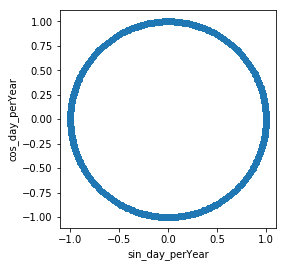

In [9]:
Accidents_2017_data.sample(len(Accidents_2017_data)).plot.scatter('sin_day_perYear','cos_day_perYear').set_aspect('equal');

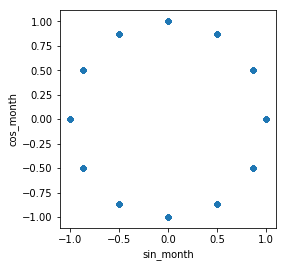

In [10]:
Accidents_2015_data['month'] = Accidents_2015_data['Date'].dt.month
Accidents_2016_data['month'] = Accidents_2016_data['Date'].dt.month
Accidents_2017_data['month'] = Accidents_2017_data['Date'].dt.month

Accidents_2015_data['sin_month'] = np.sin(2*np.pi*Accidents_2015_data.month/12)
Accidents_2015_data['cos_month'] = np.cos(2*np.pi*Accidents_2015_data.month/12)
Accidents_2015_data.drop('month', axis=1, inplace=True)


Accidents_2016_data['sin_month'] = np.sin(2*np.pi*Accidents_2016_data.month/12)
Accidents_2016_data['cos_month'] = np.cos(2*np.pi*Accidents_2016_data.month/12)
Accidents_2016_data.drop('month', axis=1, inplace=True)

Accidents_2017_data['sin_month'] = np.sin(2*np.pi*Accidents_2017_data.month/12)
Accidents_2017_data['cos_month'] = np.cos(2*np.pi*Accidents_2017_data.month/12)
Accidents_2017_data.drop('month', axis=1, inplace=True)


#Accidents_2015_data.sample(len(Accidents_2015_data)).plot.scatter('sin_month','cos_month').set_aspect('equal');
#Accidents_2016_data.sample(len(Accidents_2016_data)).plot.scatter('sin_month','cos_month').set_aspect('equal');
Accidents_2017_data.sample(len(Accidents_2017_data)).plot.scatter('sin_month','cos_month').set_aspect('equal');

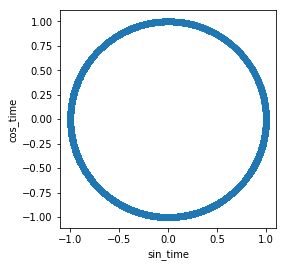

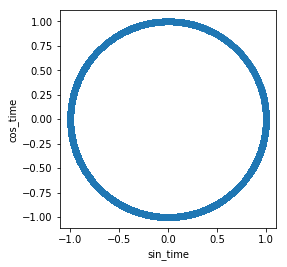

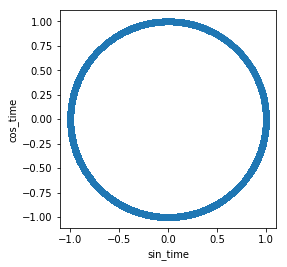

In [11]:
minutes_in_day = 24*60

Accidents_2015_data['sin_time'] = np.sin(2*np.pi*Accidents_2015_data.AbsolutTimeMinutes/(minutes_in_day-1))
Accidents_2015_data['cos_time'] = np.cos(2*np.pi*Accidents_2015_data.AbsolutTimeMinutes/(minutes_in_day-1))
Accidents_2015_data.drop('AbsolutTimeMinutes', axis=1, inplace=True)

Accidents_2016_data['sin_time'] = np.sin(2*np.pi*Accidents_2016_data.AbsolutTimeMinutes/(minutes_in_day-1))
Accidents_2016_data['cos_time'] = np.cos(2*np.pi*Accidents_2016_data.AbsolutTimeMinutes/(minutes_in_day-1))
Accidents_2016_data.drop('AbsolutTimeMinutes', axis=1, inplace=True)

Accidents_2017_data['sin_time'] = np.sin(2*np.pi*Accidents_2017_data.AbsolutTimeMinutes/(minutes_in_day-1))
Accidents_2017_data['cos_time'] = np.cos(2*np.pi*Accidents_2017_data.AbsolutTimeMinutes/(minutes_in_day-1))
Accidents_2017_data.drop('AbsolutTimeMinutes', axis=1, inplace=True)

Accidents_2015_data.sample(len(Accidents_2015_data)).plot.scatter('sin_time','cos_time').set_aspect('equal');
Accidents_2016_data.sample(len(Accidents_2016_data)).plot.scatter('sin_time','cos_time').set_aspect('equal');
Accidents_2017_data.sample(len(Accidents_2017_data)).plot.scatter('sin_time','cos_time').set_aspect('equal');

In [12]:
print(Accidents_2015_data.shape,Accidents_2016_data.shape,Accidents_2017_data.shape)
Merged_Accidents = pd.concat([Accidents_2015_data, Accidents_2016_data, Accidents_2017_data], axis=0)
print(Merged_Accidents.shape)

(140056, 44) (136621, 44) (129982, 44)
(406659, 44)


In [13]:
Merged_Accidents=Merged_Accidents.reset_index(drop=True)

In [14]:
a = np.array(Merged_Accidents['Number_of_Vehicles'].values.tolist())
Merged_Accidents['Number_of_Vehicles'] = np.where(a > 16, 100, a).tolist()
a = np.array(Merged_Accidents['Number_of_Casualties'].values.tolist())
Merged_Accidents['Number_of_Casualties'] = np.where(a > 45 , 4000, np.where(a >= 31, 3000, np.where( a >= 21, 2000, np.where(a > 15, 1000, a)) )).tolist()

#One Hot Encoding Day of Week
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Day_of_Week'], prefix='DOW')],axis=1)
# now drop the original 'Day_of_Week' column (you don't need it anymore)
Merged_Accidents.drop(['Day_of_Week'],axis=1, inplace=True)

#One Hot Encoding Number_of_Vehicles
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Number_of_Vehicles'], prefix='Number_of_Vehicles')],axis=1)
# now drop the original 'Number_of_Vehicles' column (you don't need it anymore)
Merged_Accidents.drop(['Number_of_Vehicles'],axis=1, inplace=True)

#One Hot Encoding Number_of_Casualties
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Number_of_Casualties'], prefix='Number_of_Casualties')],axis=1)
# now drop the original 'Number_of_Casualties' column (you don't need it anymore)
Merged_Accidents.drop(['Number_of_Casualties'],axis=1, inplace=True)

#One Hot Encoding Speed_Limit
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Speed_limit'], prefix='Speed_limit')],axis=1)
# now drop the original 'Speed_Limit' column (you don't need it anymore)
Merged_Accidents.drop(['Speed_limit'],axis=1, inplace=True)

#One Hot Encoding Light_Conditions
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Light_Conditions'], prefix='Light_Conditions')],axis=1)
# now drop the original 'Speed_Limit' column (you don't need it anymore)
Merged_Accidents.drop(['Light_Conditions'],axis=1, inplace=True)

#One Hot Encoding Weather_Conditions
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Weather_Conditions'], prefix='Weather_Conditions')],axis=1)
# now drop the original 'Speed_Limit' column (you don't need it anymore)
Merged_Accidents.drop(['Weather_Conditions'],axis=1, inplace=True)

#One Hot Encoding Road_Type
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Road_Type'], prefix='Road_Type')],axis=1)
# now drop the original 'Speed_Limit' column (you don't need it anymore)
Merged_Accidents.drop(['Road_Type'],axis=1, inplace=True)

#One Hot Encoding Police_Force
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Police_Force'], prefix='Police_Force')],axis=1)
# now drop the original 'Speed_Limit' column (you don't need it anymore)
Merged_Accidents.drop(['Police_Force'],axis=1, inplace=True)


#One Hot Encoding Local_Authority_(District)
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Local_Authority_(District)'], prefix='Local_Authority_(District)')],axis=1)
# now drop the original 'Local_Authority_(District)' column (you don't need it anymore)
Merged_Accidents.drop(['Local_Authority_(District)'],axis=1, inplace=True)


#One Hot Encoding Local_Authority_(Highway)
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Local_Authority_(Highway)'], prefix='Local_Authority_(Highway)')],axis=1)
# now drop the original 'Local_Authority_(Highway)' column (you don't need it anymore)
Merged_Accidents.drop(['Local_Authority_(Highway)'],axis=1, inplace=True)

#One Hot Encoding 1st_Road_Class
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['1st_Road_Class'], prefix='1st_Road_Class')],axis=1)
# now drop the original '1st_Road_Class' column (you don't need it anymore)
Merged_Accidents.drop(['1st_Road_Class'],axis=1, inplace=True)

#One Hot Encoding Junction_Detail
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Junction_Detail'], prefix='Junction_Detail')],axis=1)
# now drop the original 'Junction_Detail' column (you don't need it anymore)
Merged_Accidents.drop(['Junction_Detail'],axis=1, inplace=True)

#One Hot Encoding Junction_Control
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Junction_Control'], prefix='Junction_Control')],axis=1)
# now drop the original 'Junction_Control' column (you don't need it anymore)
Merged_Accidents.drop(['Junction_Control'],axis=1, inplace=True)

#One Hot Encoding 2nd_Road_Class
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['2nd_Road_Class'], prefix='2nd_Road_Class')],axis=1)
# now drop the original '2nd_Road_Class' column (you don't need it anymore)
Merged_Accidents.drop(['2nd_Road_Class'],axis=1, inplace=True)

#One Hot Encoding Pedestrian_Crossing-Human_Control
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Pedestrian_Crossing-Human_Control'], prefix='Pedestrian_Crossing-Human_Control')],axis=1)
# now drop the original 'Pedestrian_Crossing-Human_Control' column (you don't need it anymore)
Merged_Accidents.drop(['Pedestrian_Crossing-Human_Control'],axis=1, inplace=True)

#One Hot Encoding Pedestrian_Crossing-Physical_Facilities
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Pedestrian_Crossing-Physical_Facilities'], prefix='Pedestrian_Crossing-Physical_Facilities')],axis=1)
# now drop the original 'Pedestrian_Crossing-Physical_Facilities' column (you don't need it anymore)
Merged_Accidents.drop(['Pedestrian_Crossing-Physical_Facilities'],axis=1, inplace=True)

#One Hot Encoding Road_Surface_Conditions
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Road_Surface_Conditions'], prefix='Road_Surface_Conditions')],axis=1)
# now drop the original 'Road_Surface_Conditions' column (you don't need it anymore)
Merged_Accidents.drop(['Road_Surface_Conditions'],axis=1, inplace=True)

#One Hot Encoding Special_Conditions_at_Site
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Special_Conditions_at_Site'], prefix='Special_Conditions_at_Site')],axis=1)
# now drop the original 'Special_Conditions_at_Site' column (you don't need it anymore)
Merged_Accidents.drop(['Special_Conditions_at_Site'],axis=1, inplace=True)

#One Hot Encoding Carriageway_Hazards
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Carriageway_Hazards'], prefix='Carriageway_Hazards')],axis=1)
# now drop the original 'Carriageway_Hazards' column (you don't need it anymore)
Merged_Accidents.drop(['Carriageway_Hazards'],axis=1, inplace=True)

#One Hot Encoding Did_Police_Officer_Attend_Scene_of_Accident
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Did_Police_Officer_Attend_Scene_of_Accident'], prefix='Did_Police_Officer_Attend_Scene_of_Accident')],axis=1)
# now drop the original 'Did_Police_Officer_Attend_Scene_of_Accident' column (you don't need it anymore)
Merged_Accidents.drop(['Did_Police_Officer_Attend_Scene_of_Accident'],axis=1, inplace=True)

#One Hot Encoding Urban_or_Rural_Area
# use pd.concat to join the new columns with your original dataframe
Merged_Accidents = pd.concat([Merged_Accidents,pd.get_dummies(Merged_Accidents['Urban_or_Rural_Area'], prefix='Urban_or_Rural_Area')],axis=1)
# now drop the original 'Special_Conditions_at_Site' column (you don't need it anymore)
Merged_Accidents.drop(['Urban_or_Rural_Area'],axis=1, inplace=True)

print(Merged_Accidents.shape)
print(list(Merged_Accidents))
Merged_Accidents.head()

(406659, 804)
['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'x', 'y', 'z', 'Accident_Severity', 'Date', 'Time', '1st_Road_Number', '2nd_Road_Number', 'LSOA_of_Accident_Location', 'year', 'sin_day_perMonth', 'cos_day_perMonth', 'sin_day_perYear', 'cos_day_perYear', 'sin_month', 'cos_month', 'sin_time', 'cos_time', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'DOW_7', 'Number_of_Vehicles_1', 'Number_of_Vehicles_2', 'Number_of_Vehicles_3', 'Number_of_Vehicles_4', 'Number_of_Vehicles_5', 'Number_of_Vehicles_6', 'Number_of_Vehicles_7', 'Number_of_Vehicles_8', 'Number_of_Vehicles_9', 'Number_of_Vehicles_10', 'Number_of_Vehicles_11', 'Number_of_Vehicles_12', 'Number_of_Vehicles_13', 'Number_of_Vehicles_14', 'Number_of_Vehicles_15', 'Number_of_Vehicles_16', 'Number_of_Vehicles_100', 'Number_of_Casualties_1', 'Number_of_Casualties_2', 'Number_of_Casualties_3', 'Number_of_Casualties_4', 'Number_of_Casualties_5', 'Number_of_Casualties_6', 

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,x,y,z,Accident_Severity,Date,...,Carriageway_Hazards_3,Carriageway_Hazards_6,Carriageway_Hazards_7,Did_Police_Officer_Attend_Scene_of_Accident_-1,Did_Police_Officer_Attend_Scene_of_Accident_1,Did_Police_Officer_Attend_Scene_of_Accident_2,Did_Police_Officer_Attend_Scene_of_Accident_3,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,0.622435,-0.002156,0.782668,3,2015-01-12,...,0,0,0,0,1,0,0,1,0,0
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,0.622623,-0.001943,0.782519,3,2015-01-12,...,0,0,0,0,1,0,0,1,0,0
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,0.622307,-0.002233,0.782770,3,2015-01-12,...,0,0,0,0,1,0,0,1,0,0
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,0.622306,-0.002263,0.782771,3,2015-01-13,...,0,0,0,0,0,1,0,1,0,0
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,0.622557,-0.002239,0.782571,2,2015-01-09,...,0,0,0,0,0,1,0,1,0,0


In [15]:
features = ['x', 'y', 'z', 'year', 'sin_day_perMonth', 'cos_day_perMonth', 'sin_time', 'cos_time', 'sin_month', 'cos_month', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'DOW_7', 'Number_of_Vehicles_1', 'Number_of_Vehicles_2', 'Number_of_Vehicles_3', 'Number_of_Vehicles_4', 'Number_of_Vehicles_5', 'Number_of_Vehicles_6', 'Number_of_Vehicles_7', 'Number_of_Vehicles_8', 'Number_of_Vehicles_9', 'Number_of_Vehicles_10', 'Number_of_Vehicles_11', 'Number_of_Vehicles_12', 'Number_of_Vehicles_13', 'Number_of_Vehicles_14', 'Number_of_Vehicles_15', 'Number_of_Vehicles_16', 'Number_of_Vehicles_100', 'Number_of_Casualties_1', 'Number_of_Casualties_2', 'Number_of_Casualties_3', 'Number_of_Casualties_4', 'Number_of_Casualties_5', 'Number_of_Casualties_6', 'Number_of_Casualties_7', 'Number_of_Casualties_8', 'Number_of_Casualties_9', 'Number_of_Casualties_10', 'Number_of_Casualties_11', 'Number_of_Casualties_12', 'Number_of_Casualties_13', 'Number_of_Casualties_14', 'Number_of_Casualties_15', 'Number_of_Casualties_1000', 'Number_of_Casualties_2000', 'Number_of_Casualties_3000', 'Number_of_Casualties_4000', 'Speed_limit_0.0', 'Speed_limit_10.0', 'Speed_limit_20.0', 'Speed_limit_30.0', 'Speed_limit_40.0', 'Speed_limit_50.0', 'Speed_limit_60.0', 'Speed_limit_70.0', 'Light_Conditions_-1', 'Light_Conditions_1', 'Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6', 'Light_Conditions_7', 'Weather_Conditions_-1', 'Weather_Conditions_1', 'Weather_Conditions_2', 'Weather_Conditions_3', 'Weather_Conditions_4', 'Weather_Conditions_5', 'Weather_Conditions_6', 'Weather_Conditions_7', 'Weather_Conditions_8', 'Weather_Conditions_9', 'Road_Type_-1', 'Road_Type_1', 'Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7', 'Road_Type_9', '1st_Road_Class_1', '1st_Road_Class_2', '1st_Road_Class_3', '1st_Road_Class_4', '1st_Road_Class_5', '1st_Road_Class_6', 'Junction_Detail_-1', 'Junction_Detail_0', 'Junction_Detail_1', 'Junction_Detail_2', 'Junction_Detail_3', 'Junction_Detail_5', 'Junction_Detail_6', 'Junction_Detail_7', 'Junction_Detail_8', 'Junction_Detail_9', 'Junction_Control_-1', 'Junction_Control_0', 'Junction_Control_1', 'Junction_Control_2', 'Junction_Control_3', 'Junction_Control_4', '2nd_Road_Class_-1', '2nd_Road_Class_1', '2nd_Road_Class_2', '2nd_Road_Class_3', '2nd_Road_Class_4', '2nd_Road_Class_5', '2nd_Road_Class_6', 'Pedestrian_Crossing-Human_Control_-1', 'Pedestrian_Crossing-Human_Control_0', 'Pedestrian_Crossing-Human_Control_1', 'Pedestrian_Crossing-Human_Control_2', 'Pedestrian_Crossing-Physical_Facilities_-1', 'Pedestrian_Crossing-Physical_Facilities_0', 'Pedestrian_Crossing-Physical_Facilities_1', 'Pedestrian_Crossing-Physical_Facilities_4', 'Pedestrian_Crossing-Physical_Facilities_5', 'Pedestrian_Crossing-Physical_Facilities_7', 'Pedestrian_Crossing-Physical_Facilities_8', 'Road_Surface_Conditions_-1', 'Road_Surface_Conditions_1', 'Road_Surface_Conditions_2', 'Road_Surface_Conditions_3', 'Road_Surface_Conditions_4', 'Road_Surface_Conditions_5', 'Special_Conditions_at_Site_-1', 'Special_Conditions_at_Site_0', 'Special_Conditions_at_Site_1', 'Special_Conditions_at_Site_2', 'Special_Conditions_at_Site_3', 'Special_Conditions_at_Site_4', 'Special_Conditions_at_Site_5', 'Special_Conditions_at_Site_6', 'Special_Conditions_at_Site_7', 'Carriageway_Hazards_-1', 'Carriageway_Hazards_0', 'Carriageway_Hazards_1', 'Carriageway_Hazards_2', 'Carriageway_Hazards_3', 'Carriageway_Hazards_6', 'Carriageway_Hazards_7', 'Did_Police_Officer_Attend_Scene_of_Accident_-1', 'Did_Police_Officer_Attend_Scene_of_Accident_1', 'Did_Police_Officer_Attend_Scene_of_Accident_2', 'Did_Police_Officer_Attend_Scene_of_Accident_3', 'Urban_or_Rural_Area_1', 'Urban_or_Rural_Area_2', 'Urban_or_Rural_Area_3']

len(features)

153

In [16]:
Merged_Accidents.drop(['LSOA_of_Accident_Location'],axis=1, inplace=True)
Merged_Accidents_NullDrop = Merged_Accidents.dropna()
print(Merged_Accidents_NullDrop.shape)

(406573, 803)


In [17]:
train_features, test_features, train_labels, test_labels = train_test_split(Merged_Accidents_NullDrop[features], Merged_Accidents_NullDrop['Accident_Severity'], test_size = 0.3, random_state = 21)

RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs = -1)

RFC.fit(train_features, train_labels)

test_pred = RFC.predict(test_features)

print("Accuracy:",accuracy_score(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))  
print(classification_report(test_labels, test_pred))

Accuracy: 0.8280343029547765
[[     1     10   1497]
 [     0     56  19390]
 [     0     78 100940]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      1508
           2       0.39      0.00      0.01     19446
           3       0.83      1.00      0.91    101018

   micro avg       0.83      0.83      0.83    121972
   macro avg       0.74      0.33      0.30    121972
weighted avg       0.76      0.83      0.75    121972



In [18]:
Merged_Accidents_NullDrop.to_csv('Merged_Accidents_NullDrop.csv')

In [19]:
weights = np.where(Merged_Accidents_NullDrop['Accident_Severity'] == 3, .2, .8)
Merged_Accidents_NullDrop = Merged_Accidents_NullDrop.sample(frac=0.3, replace=True, weights=weights)
print(Merged_Accidents_NullDrop.shape)

(121972, 803)


In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(Merged_Accidents_NullDrop[features], Merged_Accidents_NullDrop['Accident_Severity'], test_size = 0.3, random_state = 21)

RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs = -1)

RFC.fit(train_features, train_labels)

test_pred = RFC.predict(test_features)

print("Accuracy:",accuracy_score(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))  
print(classification_report(test_labels, test_pred))

Accuracy: 0.7370463489287276
[[  562   335   341]
 [    3  9474  5771]
 [    1  3171 16934]]
              precision    recall  f1-score   support

           1       0.99      0.45      0.62      1238
           2       0.73      0.62      0.67     15248
           3       0.73      0.84      0.78     20106

   micro avg       0.74      0.74      0.74     36592
   macro avg       0.82      0.64      0.69     36592
weighted avg       0.74      0.74      0.73     36592



In [21]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini','entropy']
class_weight = ['balanced', None]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               'class_weight': class_weight}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(Merged_Accidents_NullDrop[features], Merged_Accidents_NullDrop['Accident_Severity'], test_size = 0.25, random_state = 21)
RFC = RandomForestClassifier()
RFC_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=21, n_jobs = -1, scoring='f1_weighted')
RFC_random.fit(train_features, train_labels)

In [ ]:
RFC_random.best_params_

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, random_state = 21)
gb.fit(train_features, train_labels)
predictions = gb.predict(test_features)
print("Accuracy:",accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))  
print(classification_report(test_labels, predictions))  

Accuracy: 0.6149158285964145
[[    3   766   469]
 [    4  6724  8520]
 [    1  4331 15774]]
              precision    recall  f1-score   support

           1       0.38      0.00      0.00      1238
           2       0.57      0.44      0.50     15248
           3       0.64      0.78      0.70     20106

   micro avg       0.61      0.61      0.61     36592
   macro avg       0.53      0.41      0.40     36592
weighted avg       0.60      0.61      0.59     36592

